## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setting Working Directory
working_directory = '/content/drive/MyDrive/csv files/Airbnb NYC 2019 .csv'
# Loading Dataset


df = pd.read_csv(working_directory )

# **Exploring Dataset**

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
df.shape

(48895, 16)

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


### **Checking Information about Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Checking Null Values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Few columns like host name,last review had many missing values and they were not of any importance for analysis,hence they will be deleted. Reviews per month column had a lot of missing rows but is important for analysis,hence missing values will be replaced with the mean of that column.

In [ ]:
df['reviews_per_month'].fillna(df['reviews_per_month'].mean(),inplace=True)
df.drop(columns=['host_name', 'last_review','name'], axis=1, inplace=True)
df.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
df['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


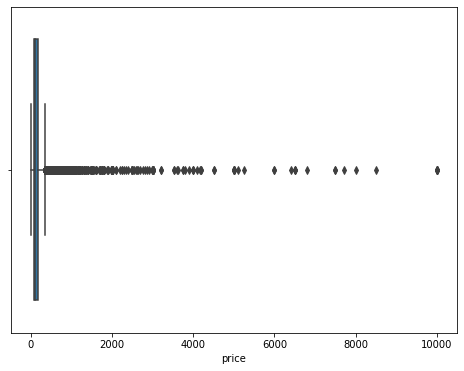

In [ ]:
#checking for outliers
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(df['price'])

In [ ]:

#remove outliers
Q1 = np.percentile(df['price'],25)
Q2 = np.percentile(df['price'],50)
Q3 = np.percentile(df['price'],75)
IQR =  Q3 - Q1
a=Q1-(1.5*IQR)
b=Q3+(1.5*IQR)
df=df[(df['price']<b) & (df['price']>a)]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


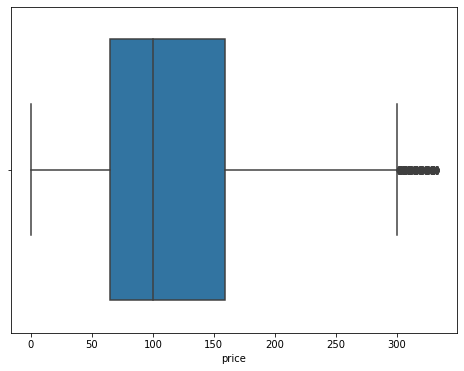

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(df['price'])


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# **Exploratory Data Analysis**

**Correlation**

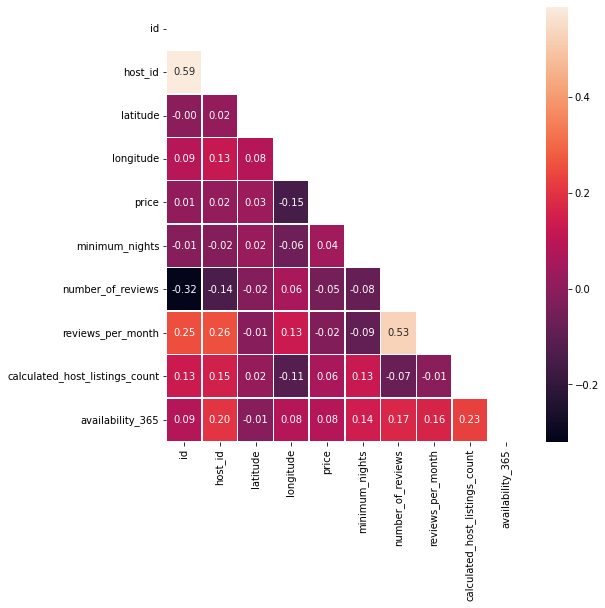

In [ ]:
import seaborn as sns
corr_1 = df.corr()
fig, ax = plt.subplots(figsize=(8, 8))
dropSelf = np.zeros_like(corr_1)
dropSelf[np.triu_indices_from(dropSelf)] = True
sns.heatmap(corr_1, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()


corr = df.corr()

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

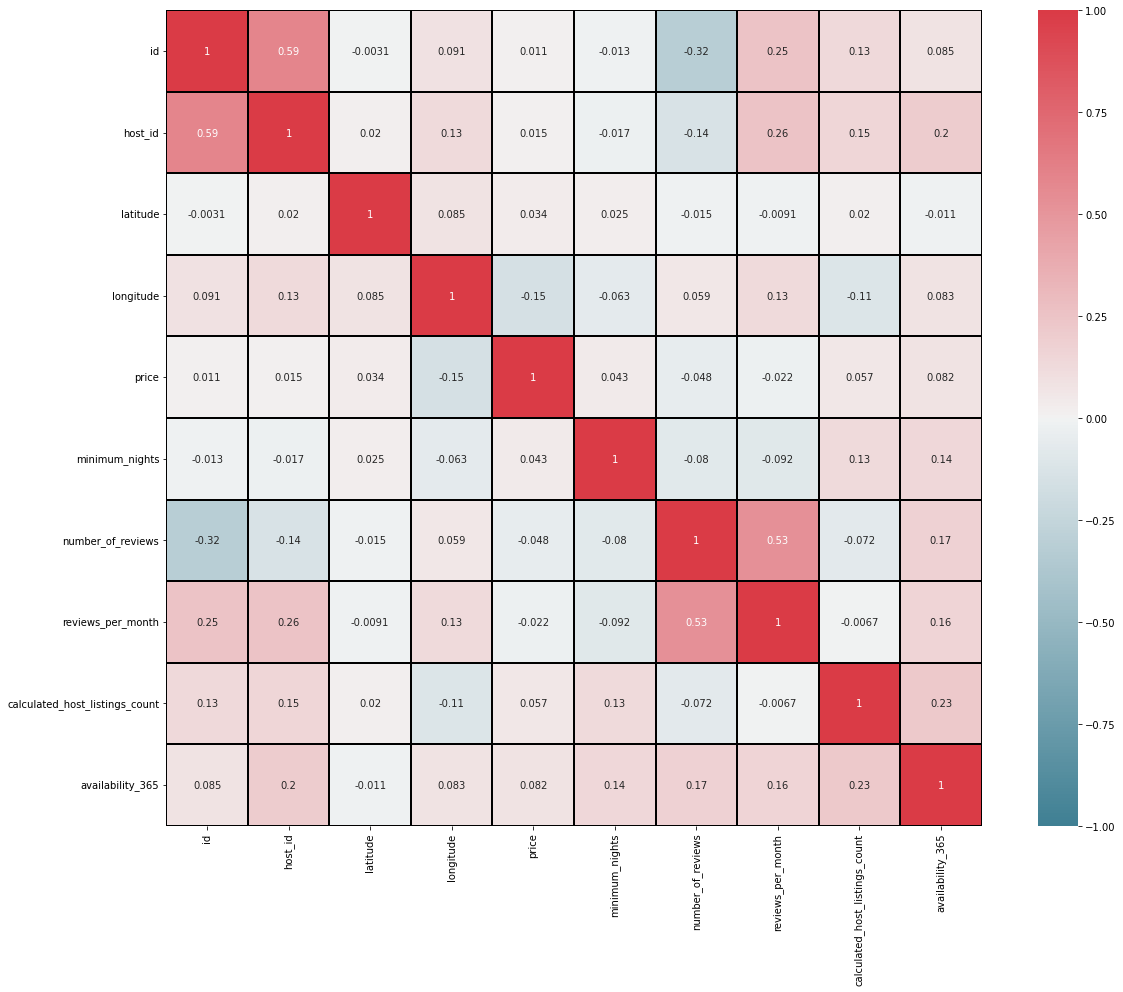

In [ ]:
import seaborn as sns
f, ax = plt.subplots(figsize=(20,15))

corr = df.corr()

sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, ax=ax,annot=True,linewidths=1 , linecolor= 'black',vmin = -1, vmax = 1)

plt.show()

**-->Relation between neighbourhood group and availability**

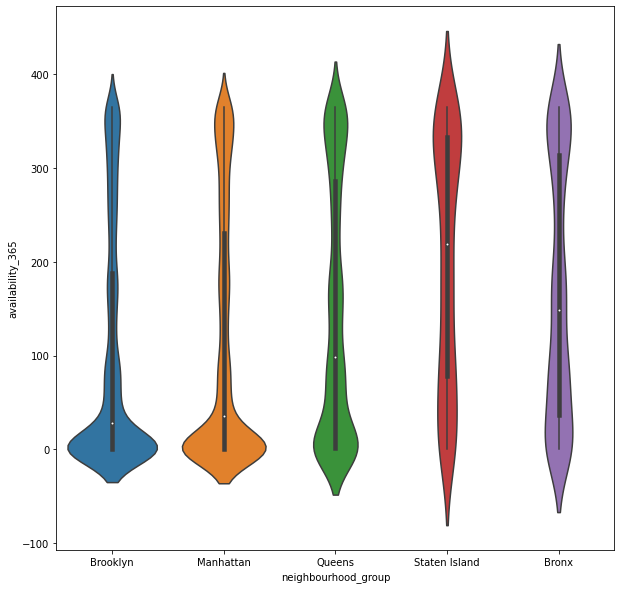

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=df, x="neighbourhood_group", y="availability_365")

Violin Plot shows that Staten Island has the highest mean availability value around 220-250 days compared to others

**-->Relation between neighbourhood group and price**

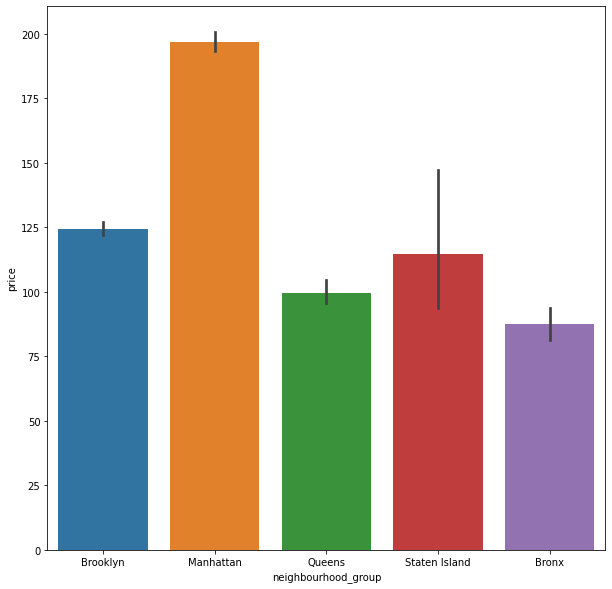

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(data=df, x='neighbourhood_group', y='price')

Bar plot plotted between neighbourhood group and price showas that Manhattan has the most expensive prices.

# **Since we have latitude and longitude of each listing, let's plot it using a scatterplot**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


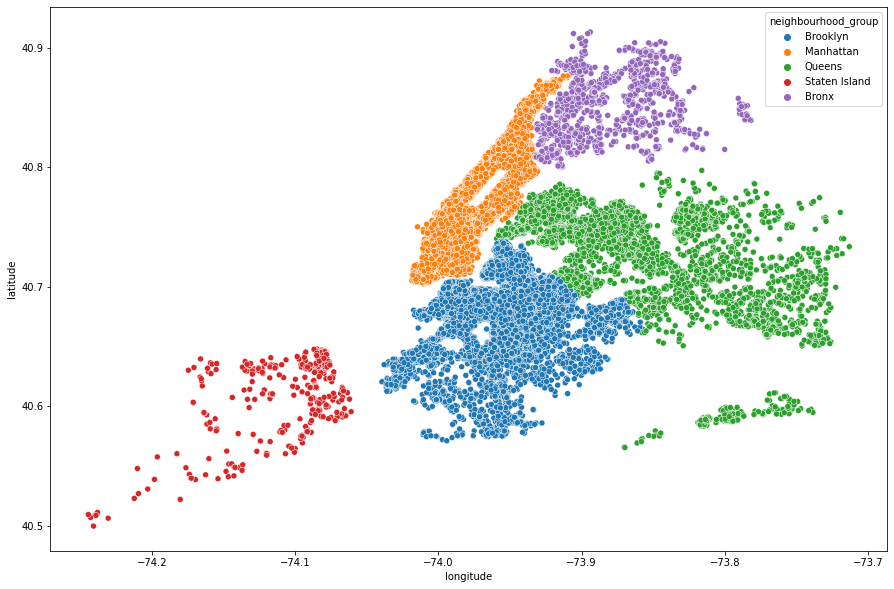

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()



**From the points on the map we can see that there is more density in the Brooklyn and Manhattan**

**-->Now let's categorise rooms based on price Let price less than 75 dollars be low, between 75 and 500 dollars be medium and
above 500 dollars be high ***

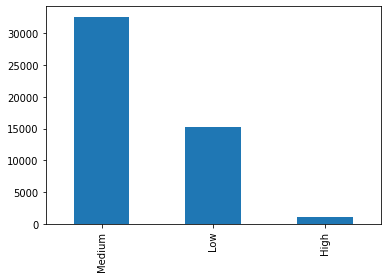

In [ ]:
def categorise(hotel_price):
    if hotel_price<=75:
        return 'Low'
    elif hotel_price >75 and hotel_price<=500:
        return 'Medium'
    else:
        return 'High'
df['price'].apply(categorise).value_counts().plot(kind='bar');

 **-->Analyse the number of reviews**

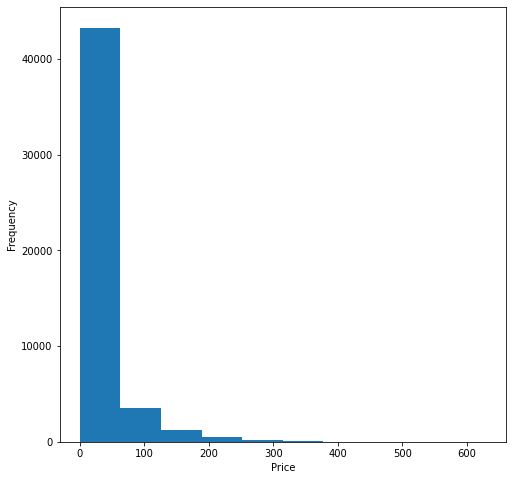

In [ ]:
plt.figure(figsize=(8,8))
df['number_of_reviews'].plot(kind='hist')
plt.xlabel("Price")
plt.ioff()
plt.show()

In [ ]:

room_price = df["room_type"].value_counts()

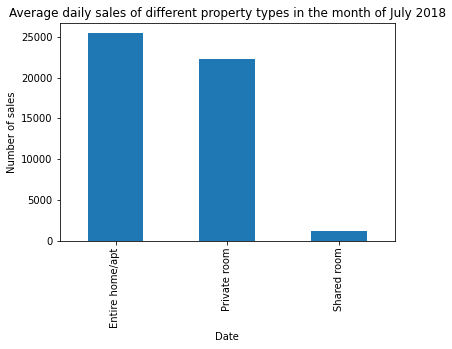

In [ ]:
room_price.plot(kind='bar')

plt.title('Average daily sales of different property types in the month of July 2018')
plt.ylabel('Number of sales')
plt.xlabel('Date')
plt.rcParams['figure.figsize'] = (10, 5)

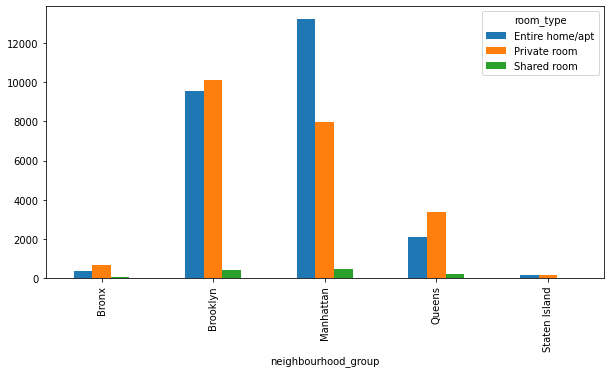

In [ ]:
room_ng=df.groupby(['neighbourhood_group','room_type'])['neighbourhood_group'].count().unstack()
room_ng.plot(kind='bar')

**-->Inference for neighbourhoods and hosts in various neighbourhood groups**

In [ ]:
Manhattan=df.loc[df['neighbourhood_group']=='Manhattan'].reset_index()
Manhattan.drop(['index'], axis=1,inplace= True)

<BarContainer object of 10 artists>

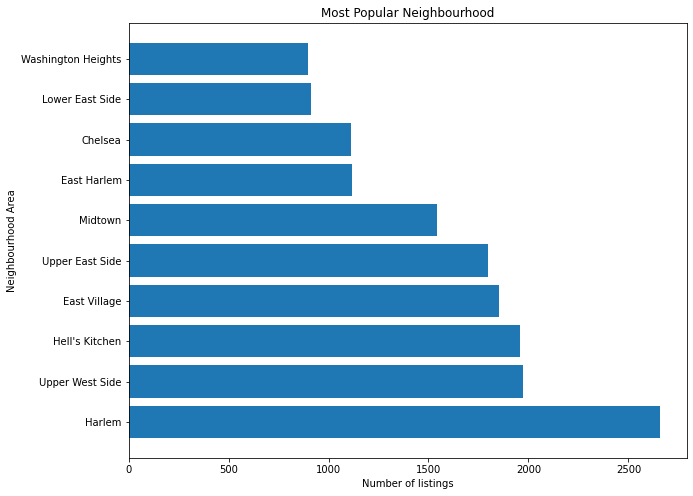

In [ ]:
data = Manhattan.neighbourhood.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

In [ ]:
Bronx=df.loc[df['neighbourhood_group']=='Bronx'].reset_index()
Bronx.drop(['index'], axis=1,inplace= True)

<BarContainer object of 10 artists>

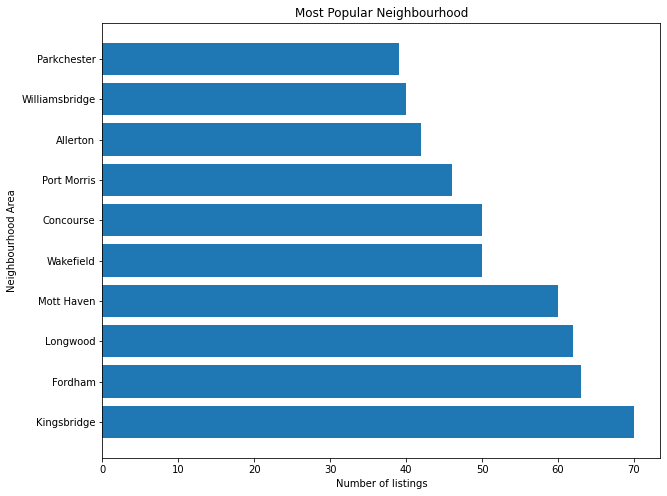

In [ ]:
data = Bronx.neighbourhood.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

In [ ]:
Brooklyn=df.loc[df['neighbourhood_group']=='Brooklyn'].reset_index()
Brooklyn.drop(['index'], axis=1,inplace= True)

<BarContainer object of 10 artists>

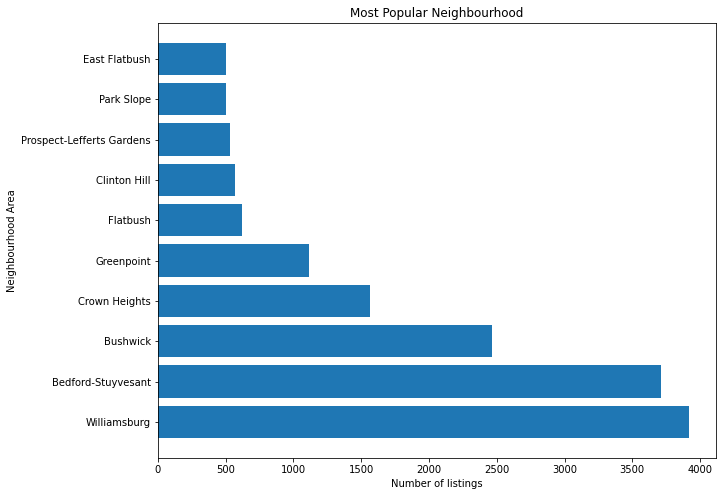

In [ ]:
data = Brooklyn.neighbourhood.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

In [ ]:
Queens=df.loc[df['neighbourhood_group']=='Queens'].reset_index()
Queens.drop(['index'], axis=1,inplace= True)

<BarContainer object of 10 artists>

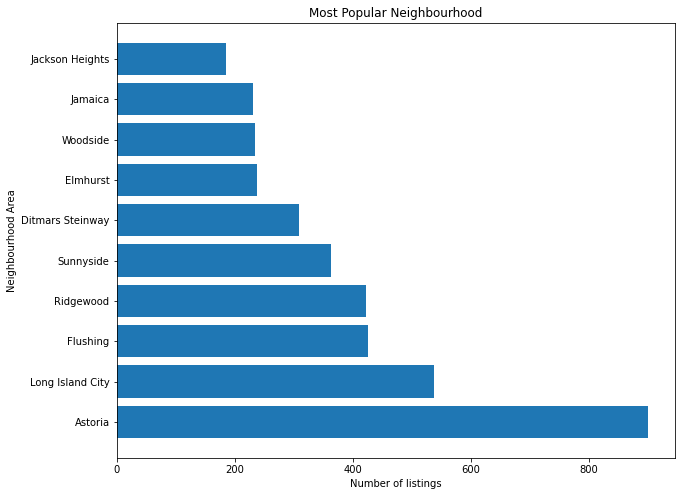

In [ ]:
data = Queens.neighbourhood.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

In [ ]:
Staten=df.loc[df['neighbourhood_group']=='Staten Island'].reset_index()
Staten.drop(['index'], axis=1,inplace= True)

<BarContainer object of 10 artists>

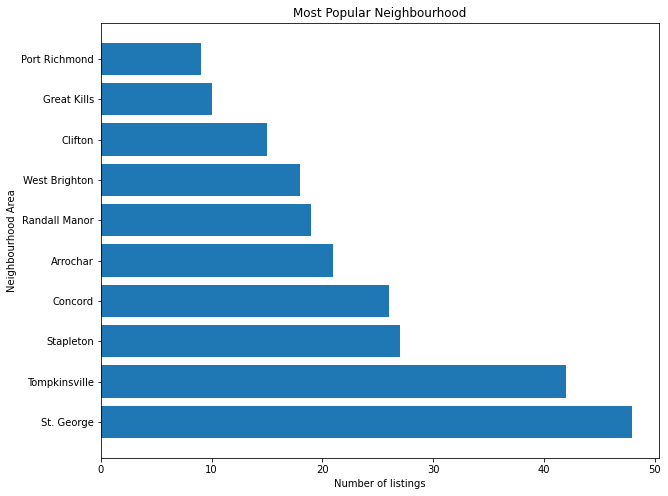

In [ ]:
data = Staten.neighbourhood.value_counts().head(10)
plt.figure(figsize=(10, 8))
x = list(data.index)
y = list(data.values)

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of listings")

plt.barh(x, y)

**-->Let's try if we get any information about the traffic**


**Now there is one more thing that we can go over
The Traffic in various areas**

From the given data we can infere that the traffic of any particular area might also depend on the number of reviews a particular place has got. We can consider the reviews per month column as a close to accurate measure for the same despite it having null values as it holds the average reviews for a property where as other columns are dependent on the date of last review.

Text(0.5, 0, 'Neighbourhood Group')

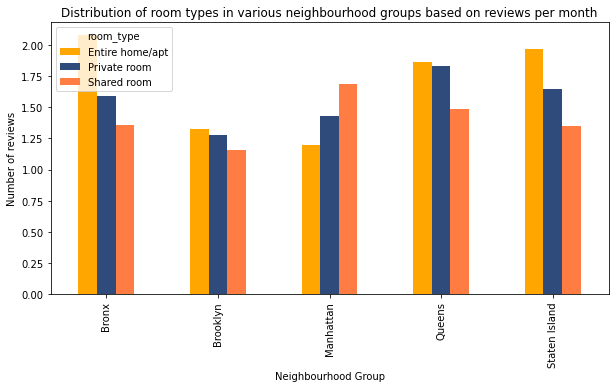

In [ ]:
#calculating the type of property which got the most reviews in a particular neighbourhood group.
room_types_neighbourgroup = df.groupby(['neighbourhood_group','room_type'])['reviews_per_month'].mean()
room_types_neighbourgroup.unstack().plot(kind='bar',color = ['#ffa600', '#2f4b7c', '#ff7c43'])
plt.title("Distribution of room types in various neighbourhood groups based on reviews per month")
plt.ylabel("Number of reviews")
plt.xlabel("Neighbourhood Group")

Text(0.5, 0, 'Neighbourhoods')

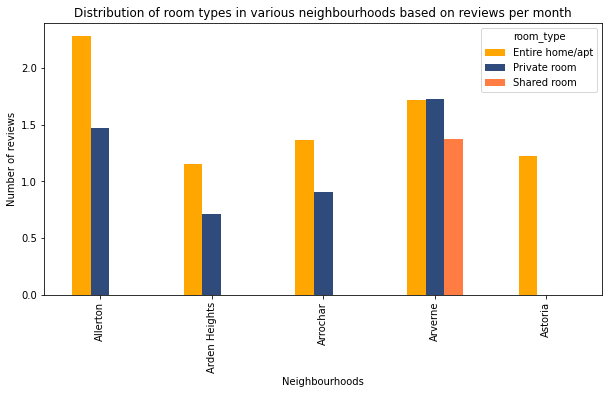

In [ ]:
#calculating the type of property which got the most reviews in a particular neighbourhood.
room_types_neighbourhood = df.groupby(['neighbourhood','room_type'])['reviews_per_month'].mean()
neighbourhoood=room_types_neighbourhood.head(10)
m=neighbourhoood.unstack().plot(kind='bar',color = ['#ffa600', '#2f4b7c', '#ff7c43'])
plt.title("Distribution of room types in various neighbourhoods based on reviews per month")
plt.ylabel("Number of reviews")
plt.xlabel("Neighbourhoods")

Text(0.5, 0, 'Neighbourhood groups')

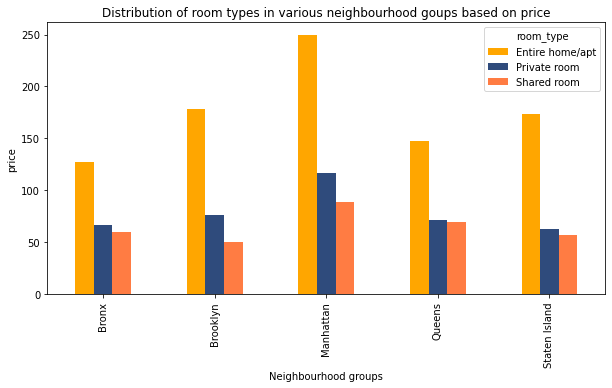

In [ ]:
#Checking if price affects the results
room_types_price = df.groupby(['neighbourhood_group','room_type'])['price'].mean()
price_room=room_types_price
price_room.unstack().plot(kind='bar',color = ['#ffa600', '#2f4b7c', '#ff7c43'])
plt.title("Distribution of room types in various neighbourhood goups based on price")
plt.ylabel("price")
plt.xlabel("Neighbourhood groups")

**Conclusion**


This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings. Further, we came back to the first column with name strings and had to do a bit more coding to parse each title and analyze existing trends on how listings are named as well as what was the count for the most used words by hosts. Lastly, we found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb Data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new features and much more.